In [1]:
import json
import time
import networkx as nx

In [2]:
with open('./dataset.json', 'r', encoding='UTF-8') as f:
    content = f.read()
    data = json.loads(content)

In [3]:
data.keys()

dict_keys(['nodes', 'edges', 'clusters', 'tags'])

In [4]:
data['edges'][0]

['cytoscape', 'computational genomics']

In [5]:
tuple(data['edges'][0])

('cytoscape', 'computational genomics')

In [6]:
data['nodes'][0]

{'key': 'cytoscape',
 'label': 'Cytoscape',
 'tag': 'Tool',
 'URL': 'https://en.wikipedia.org/wiki/Cytoscape',
 'cluster': '0',
 'x': 643.82275390625,
 'y': -770.3126220703125,
 'score': 6.909602204225056e-05}

In [7]:
DG = nx.DiGraph()

In [8]:
# for edge in data['edges']:
#     G.add_edge(*(tuple(edge)))
[DG.add_edge(*(tuple(edge)))for edge in data['edges']]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [9]:
len(DG.edges())

5409

In [10]:
len(DG.nodes())

2085

In [11]:
attrs_dict = {}

keys_to_extract = ['label','tag','URL']

for node_attrs in data['nodes']:
    node = node_attrs['key']
    sub_dict = {key: node_attrs[key] for key in keys_to_extract if key in node_attrs}
    attrs_dict[node] = sub_dict

In [12]:
attrs_dict 

{'cytoscape': {'label': 'Cytoscape',
  'tag': 'Tool',
  'URL': 'https://en.wikipedia.org/wiki/Cytoscape'},
 'microsoft excel': {'label': 'Microsoft Excel',
  'tag': 'Tool',
  'URL': 'https://en.wikipedia.org/wiki/Microsoft%20Excel'},
 'gephi': {'label': 'Gephi',
  'tag': 'Tool',
  'URL': 'https://en.wikipedia.org/wiki/Gephi'},
 'microsoft power bi': {'label': 'Microsoft Power BI',
  'tag': 'Tool',
  'URL': 'https://en.wikipedia.org/wiki/Microsoft%20Power%20BI'},
 'qlik': {'label': 'Qlik',
  'tag': 'Tool',
  'URL': 'https://en.wikipedia.org/wiki/Qlik'},
 'venn diagram': {'label': 'Venn diagram',
  'tag': 'Chart type',
  'URL': 'https://en.wikipedia.org/wiki/Venn%20diagram'},
 'radar chart': {'label': 'Radar chart',
  'tag': 'Chart type',
  'URL': 'https://en.wikipedia.org/wiki/Radar%20chart'},
 'flowchart': {'label': 'Flowchart',
  'tag': 'Chart type',
  'URL': 'https://en.wikipedia.org/wiki/Flowchart'},
 'box plot': {'label': 'Box plot',
  'tag': 'Chart type',
  'URL': 'https://en.wiki

In [13]:
nx.set_node_attributes(DG, attrs_dict)

19.68254041671753 s


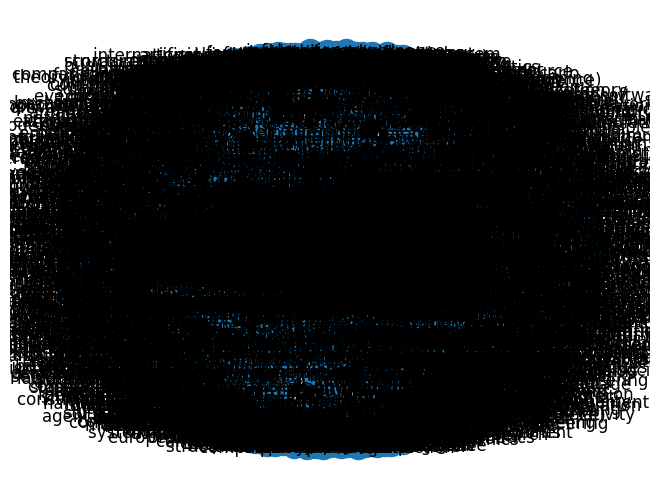

In [14]:
start_time = time.time()
nx.draw(DG, with_labels=True)
end_time = time.time()
print(f'{end_time - start_time} s')

In [15]:
from ipysigma import Sigma

start_time = time.time()

Sigma(DG, 
      node_color="tag",
      node_label_size=DG.degree,
      node_size=DG.degree
     )

end_time = time.time()
print(f'{end_time - start_time}')

0.04700016975402832


In [16]:
Sigma(
    DG,
    node_metrics=['louvain'],
    node_color='louvain',
    node_size_range=(3, 20),
    max_categorical_colors=30,
    default_edge_type='curve',
    node_border_color_from='node',
    default_node_label_size=14,
    node_size=DG.degree
)

Sigma(nx.DiGraph with 2,085 nodes and 5,409 edges)

In [17]:
Sigma.write_html(
    DG,
    './dataset.html',
    fullscreen=True,
    node_metrics=['louvain'],
    node_color='louvain',
    node_size_range=(3, 20),
    max_categorical_colors=30,
    default_edge_type='curve',
    node_border_color_from='node',
    default_node_label_size=14,
    node_size=DG.degree
)